In [2]:
import pandas as pd

# Reload the dataset to proceed with the Random Forest steps
file_path = 'Tweets_Cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
data.head()


,text,sentiment,word_count,char_count,avg_word
0,id responded going,neutral,3,18,5.333333
1,NaN,negative,1,0,0.000000
2,bos bullying,negative,2,12,5.500000
3,interview leave alone,negative,3,21,6.333333
4,son couldnt put release already bought,negative,6,38,5.500000


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("Tweets_Cleaned.csv")

# Preprocessing: Encode the 'sentiment' column
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Handle missing values in the 'text' column
data['text'] = data['text'].fillna('')

# Split dataset into features and target
X_text = data['text']
y = data['sentiment_encoded']

# Split the data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

# Define a pipeline with TF-IDF vectorization and Random Forest
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model on training data
grid_search.fit(X_train_text, y_train)

# Best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test_text)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Best Parameters: {'rf__max_depth': 30, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
Accuracy: 0.6273653566229985

Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.33      0.47      1572
     neutral       0.54      0.87      0.67      2236
    positive       0.79      0.58      0.67      1688

    accuracy                           0.63      5496
   macro avg       0.71      0.59      0.60      5496
weighted avg       0.69      0.63      0.61      5496



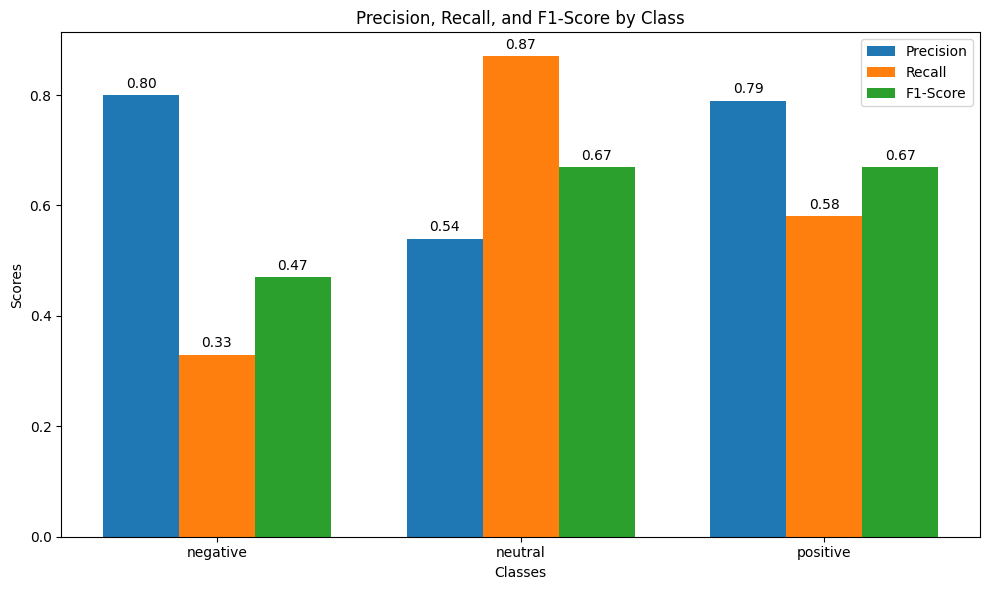

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for graphs
classes = ['negative', 'neutral', 'positive']
precision = [0.80, 0.54, 0.79]
recall = [0.33, 0.87, 0.58]
f1_score = [0.47, 0.67, 0.67]

# Plot Precision, Recall, and F1-Score for each class
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(classes))  # Label locations
width = 0.25  # Bar width

# Bar plots
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Add values on top of the bars
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


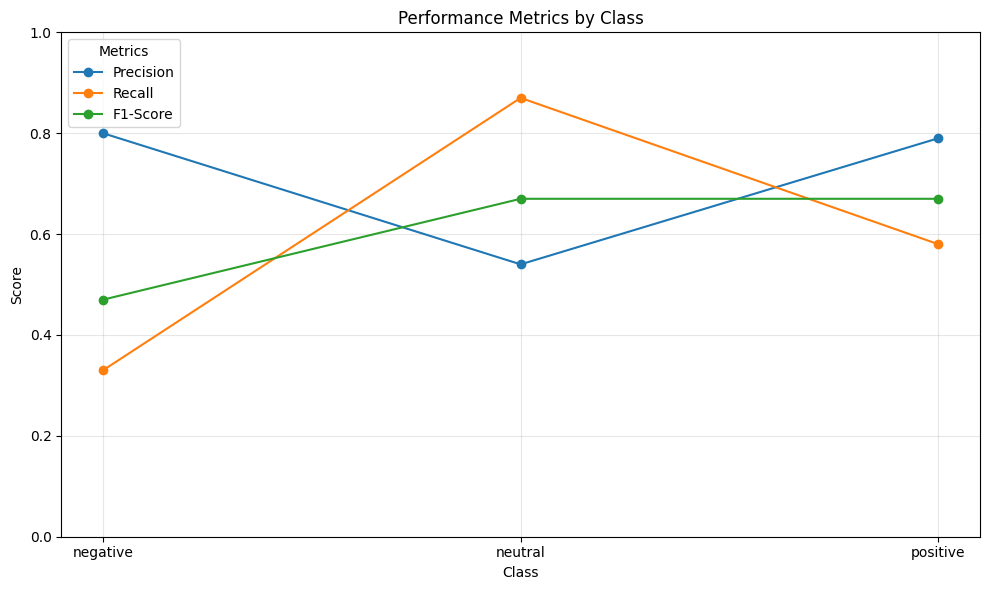

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for visualization
data = {
    'Class': ['negative', 'neutral', 'positive'],
    'Precision': [0.80, 0.54, 0.79],
    'Recall': [0.33, 0.87, 0.58],
    'F1-Score': [0.47, 0.67, 0.67]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Plot line graph
plt.figure(figsize=(10, 6))
for metric in ['Precision', 'Recall', 'F1-Score']:
    plt.plot(df['Class'], df[metric], marker='o', label=metric)

# Customize the plot
plt.title('Performance Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metrics', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()


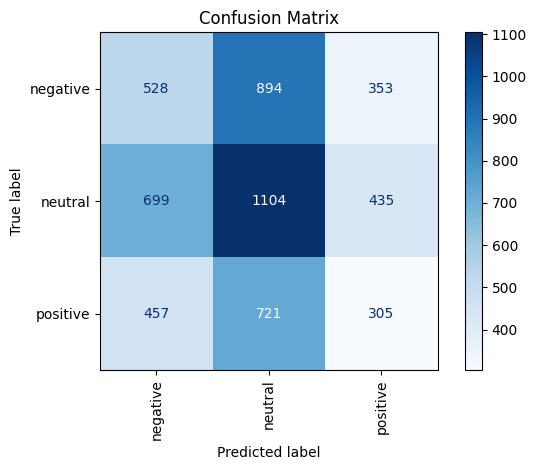

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Example true and predicted labels (replace these with your actual data)
y_true = np.random.choice([0, 1, 2], 5496, p=[0.33, 0.40, 0.27])  # Example true labels
y_pred = np.random.choice([0, 1, 2], 5496, p=[0.30, 0.50, 0.20])  # Example predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap='Blues', xticks_rotation='vertical')

# Customize plot
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [19]:
# Create a pipeline with TF-IDF and Decision Tree
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Limit features to simplify the tree
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'dt__max_depth': [5, 10, 15, 20],            # Depth of the tree
    'dt__min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'dt__min_samples_leaf': [1, 2, 4],           # Minimum samples required at a leaf node
    'dt__criterion': ['gini', 'entropy']         # Split criterion
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_text, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test_text)

# Classification Report
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Accuracy: 0.5816957787481805

Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.23      0.35      1572
     neutral       0.51      0.89      0.65      2236
    positive       0.78      0.50      0.61      1688

    accuracy                           0.58      5496
   macro avg       0.68      0.54      0.54      5496
weighted avg       0.66      0.58      0.55      5496



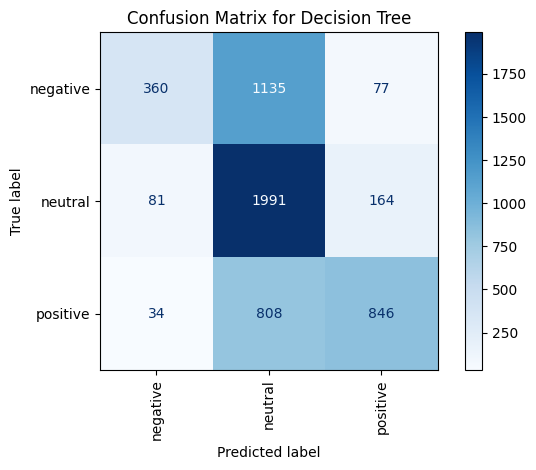

In [20]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix for Decision Tree')
plt.tight_layout()
plt.show()



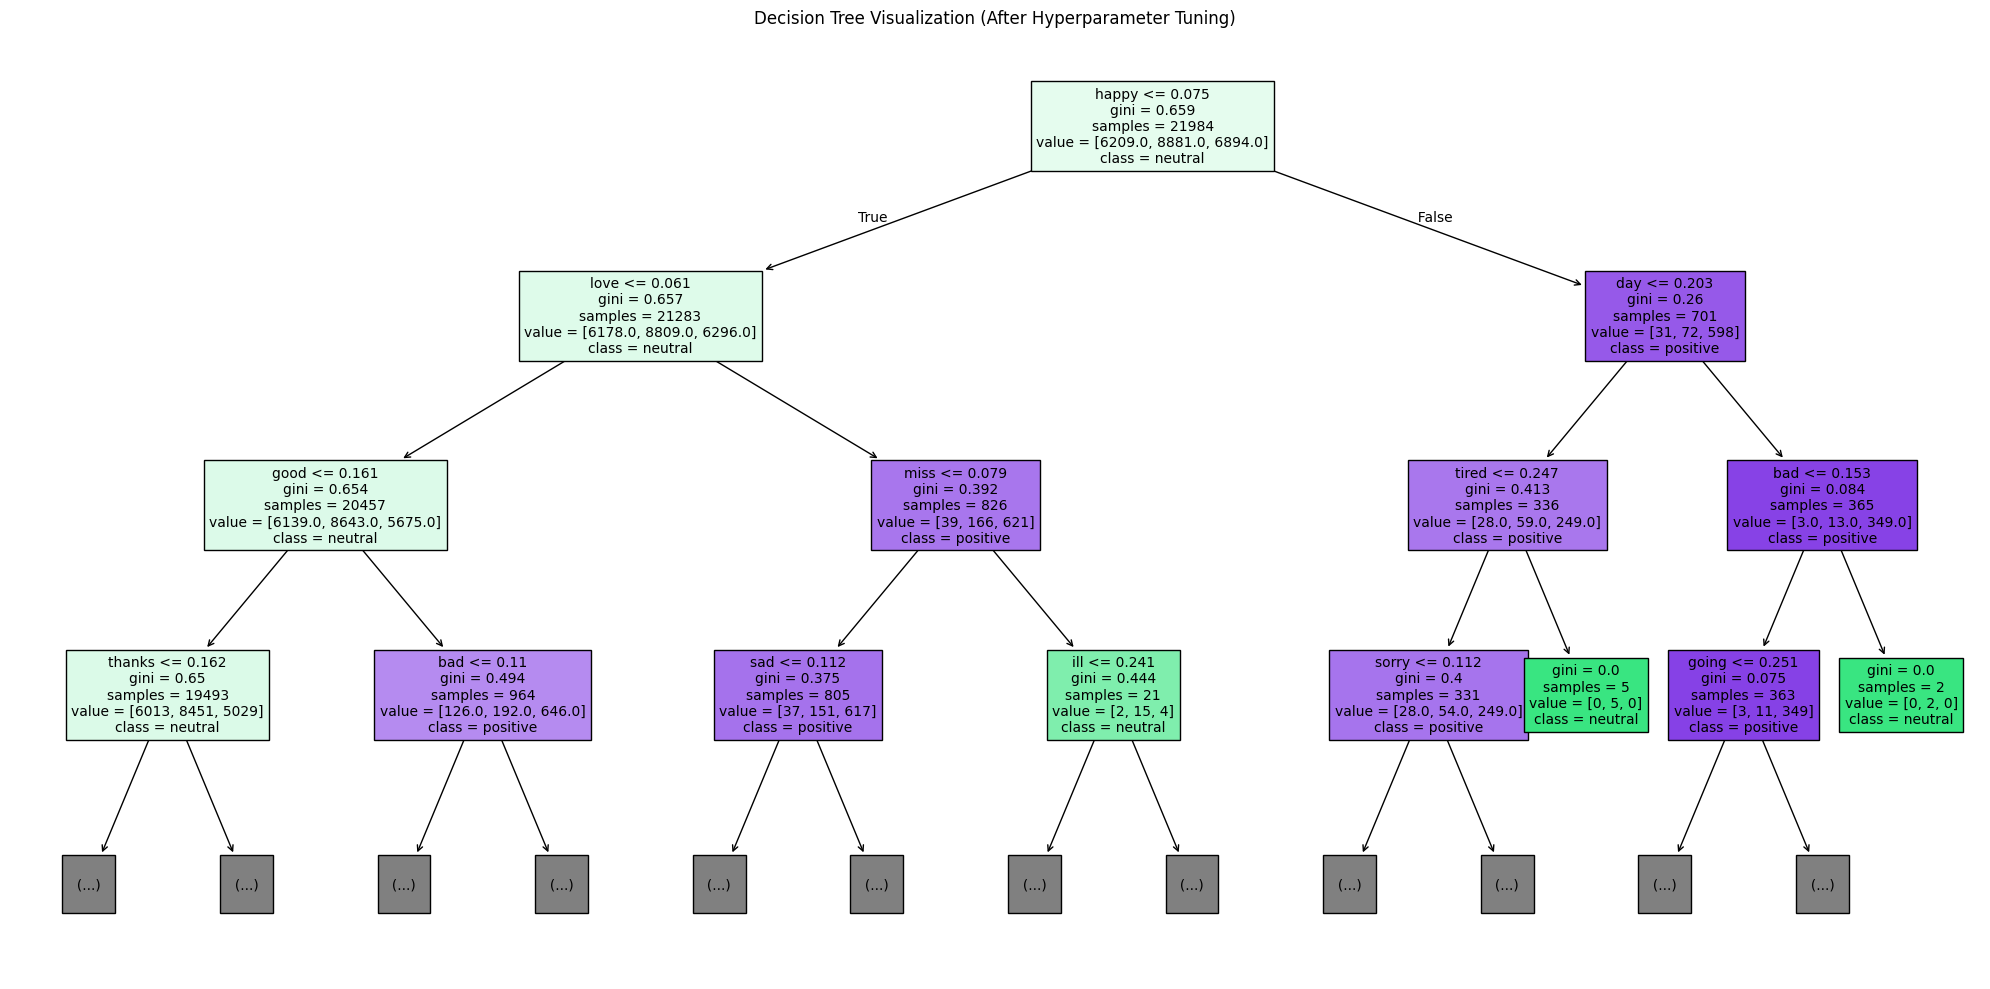

In [24]:
# Plot the tree (limit depth for visualization)
dt_model = best_model.named_steps['dt']
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          max_depth=3,  # Adjust depth for clarity
          filled=True,
          feature_names=best_model.named_steps['tfidf'].get_feature_names_out(),
          class_names=label_encoder.classes_,
          fontsize=10)
plt.title('Decision Tree Visualization (After Hyperparameter Tuning)')
plt.tight_layout()
plt.show()

In [41]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Tweets_Cleaned.csv")

# Check and encode the target variable
if 'sentiment_encoded' not in data.columns:
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Prepare text and numeric features
X_text = data['text'].fillna('')  # Handle missing text
X_features = data[['word_count', 'char_count', 'avg_word']]  # Numeric features
y = data['sentiment_encoded']

# Split into training and testing sets
X_train_text, X_test_text, X_train_features, X_test_features, y_train, y_test = train_test_split(
    X_text, X_features, y, test_size=0.2, random_state=42
)

# Combine features into a single DataFrame
X_train = pd.concat([X_train_text.reset_index(drop=True), X_train_features.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_text.reset_index(drop=True), X_test_features.reset_index(drop=True)], axis=1)

# Update the ColumnTransformer with MinMaxScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000, ngram_range=(1, 2)), 'text'),  # Process text
        ('numeric', MinMaxScaler(), ['word_count', 'char_count', 'avg_word'])     # Scale numeric features
    ]
)

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('nb', MultinomialNB())
])

# Define hyperparameter grid
param_grid = {
    'preprocessor__text__max_features': [3000, 5000, 7000],  # TF-IDF max features
    'preprocessor__text__ngram_range': [(1, 1), (1, 2)],  # Unigrams or bigrams
    'nb__alpha': [0.1, 0.5, 1.0, 5.0],  # Smoothing parameter
    'nb__fit_prior': [True, False]  # Learn class priors or not
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))




Best Parameters: {'nb__alpha': 1.0, 'nb__fit_prior': True, 'preprocessor__text__max_features': 3000, 'preprocessor__text__ngram_range': (1, 2)}
Accuracy: 0.6277292576419214

Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.44      0.54      1572
     neutral       0.55      0.80      0.65      2236
    positive       0.76      0.57      0.65      1688

    accuracy                           0.63      5496
   macro avg       0.68      0.60      0.62      5496
weighted avg       0.66      0.63      0.62      5496



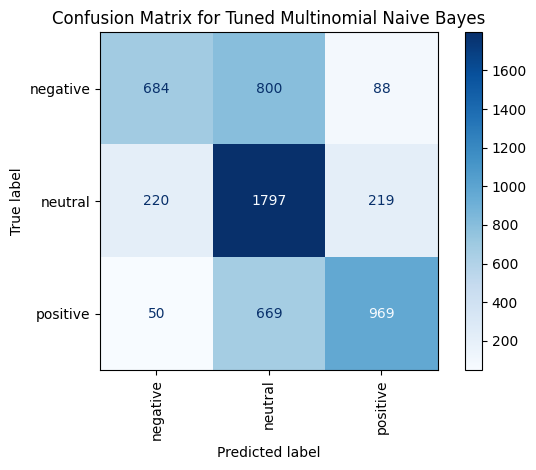

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix for Tuned Multinomial Naive Bayes')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

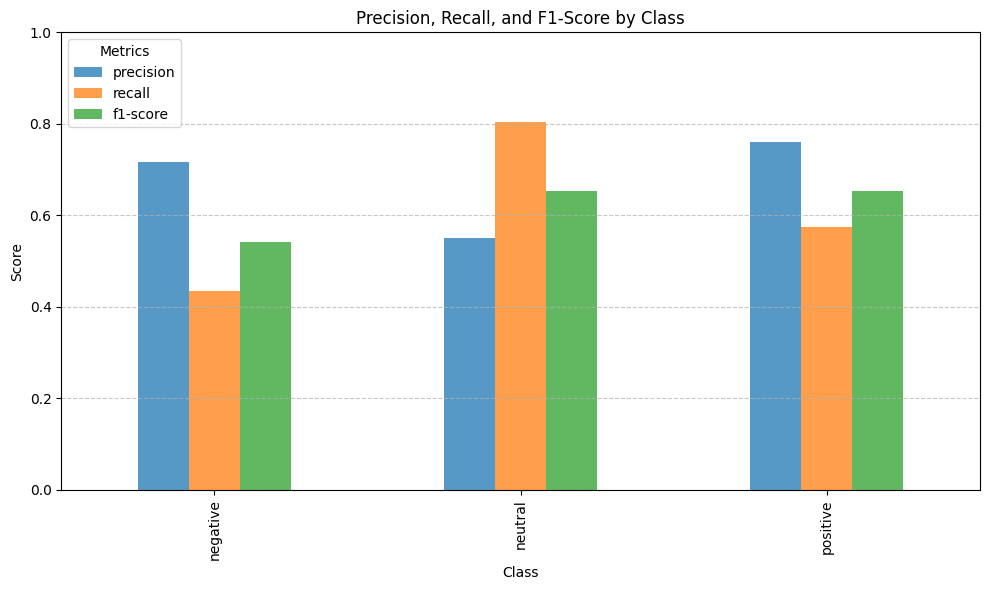

In [43]:
# Classification Report as a DataFrame
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Precision, Recall, F1-Score Graph
plt.figure(figsize=(10, 6))
metrics = report_df.loc[['negative', 'neutral', 'positive'], ['precision', 'recall', 'f1-score']]
metrics.plot(kind='bar', figsize=(10, 6), alpha=0.75)
plt.title("Precision, Recall, and F1-Score by Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics", loc="upper left")
plt.tight_layout()
plt.show()

<ipython-input-45-2836c28a6169>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='pastel')


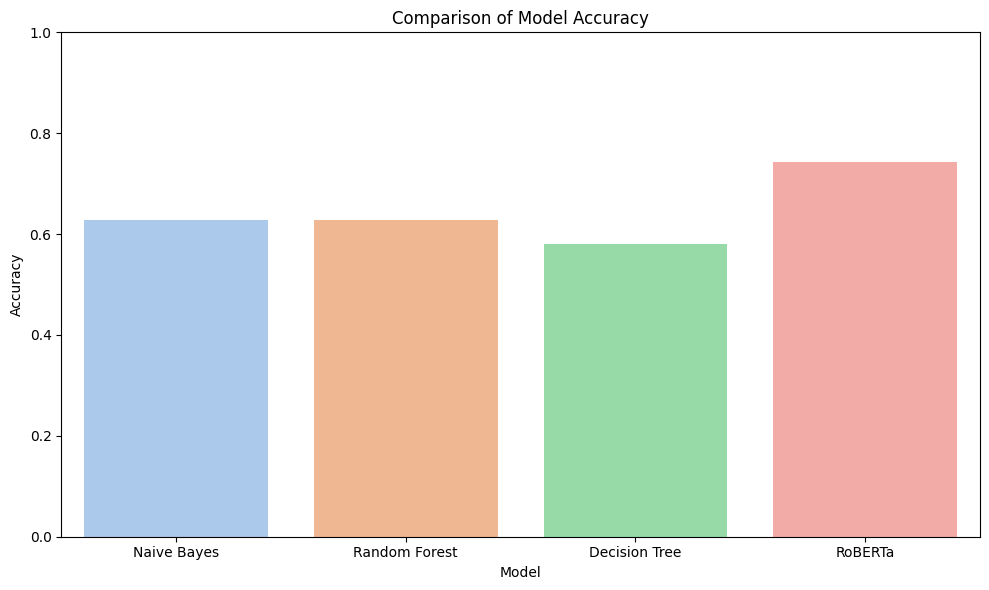

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define model results
model_results = {
    'Model': ['Naive Bayes', 'Random Forest', 'Decision Tree', 'RoBERTa'],
    'Accuracy': [0.627, 0.627, 0.581, 0.7429]  # Replace with actual accuracies
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results)

# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='pastel')
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.tight_layout()
plt.show()


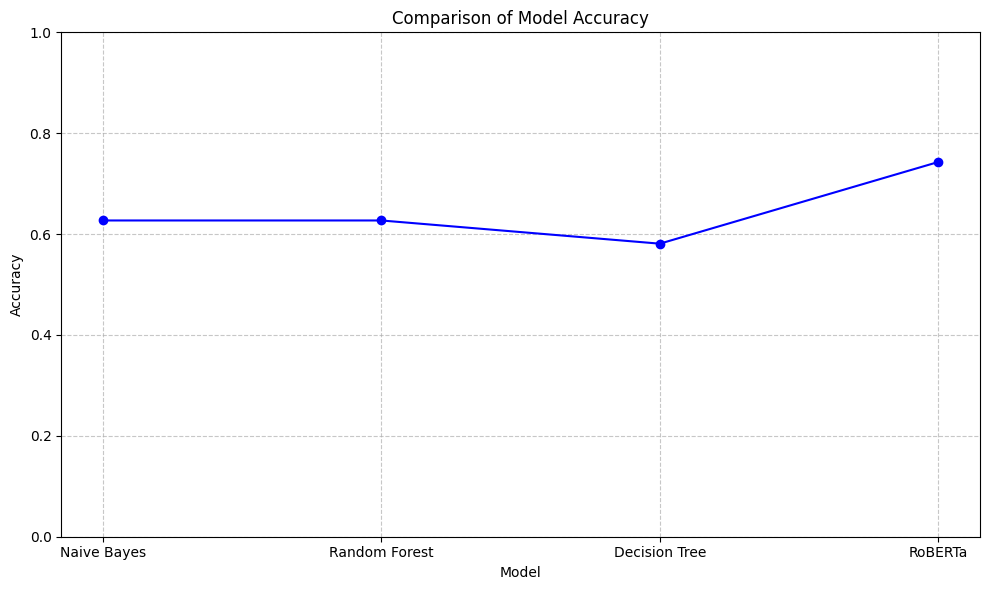

In [48]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['Model'], results_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()